<a href="https://colab.research.google.com/github/Riya0923/Car_Price_Prediction_Model/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/train-data.csv', index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [166]:
df.shape

(6019, 13)

In [167]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [168]:
# Since 'New_Price' is having 90% of null values
df1=df.drop('New_Price' , axis='columns')
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [169]:
df1.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [170]:
# Resolving 2 null values of 'Mileage' column
# Splitting the data using ' ' and converting the numeric part into float
# Since we cannot use split function with NaN values else it will throw an error(as by default NaN are float and split function does not work with float values), thus we use exception handling
def fix_unit(x):
  try:
    return float(x.split(' ')[0])
  except:
    return x
# returning x only because there may be any other type of data present other than null

In [171]:
# Without removing the null values, converting them into numeric values
df1['Mileage']=df1['Mileage'].apply(fix_unit)
# Same can be done with the 'Engine' column
df1['Engine']=df1['Engine'].apply(fix_unit)
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [172]:
# Same thing we perform for the 'Power' column, then
df1['Power']=df1['Power'].apply(fix_unit)
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [173]:
# Even after applying the same procedure, 'power' column remains as an object
# For 'Power' columnn we cannot perform same actions as we did for 'Mileage' and 'Engine' , as there are null values with units in 'Power' column.
df1.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [174]:
# Finding where the 'Power' data has float value stored
df1['Power'].apply(lambda x : type(x)==float)

0       True
1       True
2       True
3       True
4       True
        ... 
6014    True
6015    True
6016    True
6017    True
6018    True
Name: Power, Length: 6019, dtype: bool

In [175]:
# Finding where the 'Power' data has NaN values
df1[df1['Power'].apply(lambda x : type(x)!=float)]
# 107 rows having 'null bhp' values, thus we need to convert these into null values

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,null bhp,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,null bhp,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,null bhp,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,null bhp,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,null bhp,5.0,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,null bhp,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,null bhp,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,null bhp,6.0,1.70


In [176]:
# Checking whether there are any other types of values or not (other than 'null bhp')
df1[df1['Power'].apply(lambda x : type(x)!=float)]['Power'].unique()

array(['null bhp'], dtype=object)

In [177]:
# Changing those 'null bhp' to null
df1['Power']=df1['Power'].apply(lambda x : x if type(x)==float else np.nan)

In [178]:
# Now check for the types of values in 'Power'
df1.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [179]:
df1.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [180]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [181]:
df1['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [182]:
df1['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [183]:
# Dropping the CNG,LPG and Electric cars due to their lesser sample size.
df2=df1[df1['Fuel_Type'].isin(['Diesel', 'Petrol'])]
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [184]:
# Similarly checking for transmission
df2['Transmission'].value_counts()

Manual       4233
Automatic    1718
Name: Transmission, dtype: int64

In [185]:
df2['Owner_Type'].value_counts()

First             4874
Second             956
Third              112
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [186]:
# Making only two categories for 'Owner-Type' as many are having very less sample size
df2['Owner_Type']=df2['Owner_Type'].apply (lambda x: 'First' if x=='First' else 'Second and above')

<ipython-input-186-f4107f8448f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Owner_Type']=df2['Owner_Type'].apply (lambda x: 'First' if x=='First' else 'Second and above')


In [187]:
df2['Owner_Type'].value_counts()

First               4874
Second and above    1077
Name: Owner_Type, dtype: int64

In [188]:
df2['Location'].value_counts()
# we don't have to bring any changes here

Mumbai        771
Hyderabad     733
Kochi         643
Coimbatore    636
Pune          608
Delhi         544
Kolkata       535
Chennai       491
Jaipur        411
Bangalore     358
Ahmedabad     221
Name: Location, dtype: int64

In [189]:
df2['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Audi A4 2.0 TFSI                  1
Volvo S60 D4 SUMMUM               1
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1847, dtype: int64

In [190]:
# Since there are large no. of varieties in the name of the cars so we need to reduce that
len(df2['Name'].unique())

1847

In [191]:
# Converting all names to the lowercase letter in order to reduce the variety of names
df2['Name']=df2['Name'].str.lower()

<ipython-input-191-a3f23a47f244>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name']=df2['Name'].str.lower()


In [192]:
len(df2['Name'].unique())

1823

In [193]:
# Removing extra spaces before or after the names
df2['Name']=df2['Name'].str.strip()

<ipython-input-193-194195764185>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name']=df2['Name'].str.strip()


In [194]:
len(df2['Name'].unique())

1823

In [195]:
df2['Name'].value_counts()
# Since there are many car types having minimum sample size but we cannot group them into one as 'others' , as any car expert would not suggest that.
# But we can combine all the models of one brand together in order to reduce the no. of categories of cars.

maruti swift dzire vdi                50
mahindra xuv500 w8 2wd                49
maruti swift vdi                      45
honda city 1.5 s mt                   34
maruti swift vdi bsiv                 31
                                      ..
volkswagen vento 1.5 tdi trendline     1
mercedes-benz e-class e 350 d          1
maruti swift 1.3 vxi abs               1
skoda fabia 1.2 mpi ambition plus      1
mahindra xylo d4 bsiv                  1
Name: Name, Length: 1823, dtype: int64

In [196]:
#Combining all cars with same names
df2['Name']=df2['Name'].apply(lambda x : ' '.join(x.split(' ')[:2]))

<ipython-input-196-d14174beebc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name']=df2['Name'].apply(lambda x : ' '.join(x.split(' ')[:2]))


In [197]:
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [198]:
len(df2['Name'].unique())

213

In [199]:
df2['Name'].value_counts()
# still there are many samples having minimum size as compared to other samples


maruti swift         353
honda city           270
hyundai i20          247
hyundai verna        170
toyota innova        164
                    ... 
volkswagen beetle      1
fiat petra             1
volkswagen tiguan      1
mini countryman        1
jaguar f               1
Name: Name, Length: 213, dtype: int64

In [200]:
# If we use those samples for training our model then it will give a biased prediction
# Thus we will use THRESHOLD values
# If a type of car having sample size lesser than 30 -> we will remove those samples
# As lesser sample will generate lesser information for a ML model to be trained
car_count=df2['Name'].value_counts()
car_count_more_than_30 = car_count[car_count>30]
car_count_more_than_30

maruti swift             353
honda city               270
hyundai i20              247
hyundai verna            170
toyota innova            164
hyundai i10              155
hyundai grand            152
volkswagen polo          151
maruti alto              134
maruti wagon             126
mahindra xuv500          113
volkswagen vento         107
honda amaze              106
ford figo                101
toyota fortuner          101
bmw 3                     98
ford ecosport             95
mercedes-benz new         94
hyundai creta             93
mercedes-benz e-class     88
renault duster            83
audi a4                   78
hyundai santro            74
maruti ciaz               71
maruti ertiga             71
bmw 5                     68
toyota corolla            67
maruti ritz               64
maruti baleno             63
mahindra scorpio          61
toyota etios              61
land rover                60
honda brio                60
hyundai eon               60
honda jazz    

In [201]:
# Filter the data to get samples of only those cars which are present in car_count_more_than_30
print('honda civic' in car_count_more_than_30)
print('jaguar f' in car_count_more_than_30)

True
False


In [202]:
df2['Name'].apply(lambda x : x in car_count_more_than_30)

1        True
2        True
3        True
4        True
6        True
        ...  
6014     True
6015     True
6016    False
6017     True
6018     True
Name: Name, Length: 5951, dtype: bool

In [203]:
# Sample size more than 30
df3= df2[df2['Name'].apply(lambda x : x in car_count_more_than_30)]
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [204]:
# length after taking samples with size more than 30
len(df3['Name'].unique())
# Now we have only 52 categories of cars for which we have to train the model
# Our model will now give more acuurate prediction as these cars are having enough informations (rest of them were not having enough information)

52

In [205]:
df3.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                32
Power                116
Seats                 35
Price                  0
dtype: int64

In [206]:
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [207]:
# Apart from null values check for zero(0) values
(df3==0).sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              49
Engine                0
Power                 0
Seats                 1
Price                 0
dtype: int64

In [208]:
# apply() : to apply an user defined function on a data column or data series
# applymap() : to apply an user defined function on an entire dataframe

In [209]:
# Converting all zeroes to null values
df3 = df3.applymap(lambda x : np.nan if x==0 else x)

In [210]:
df3.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               49
Engine                32
Power                116
Seats                 36
Price                  0
dtype: int64

In [211]:
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [212]:
# Here the values of Engine and Power are depending upon the Transmission and Fuel_Type
# Let us check for their mean and median values
print('Mean:')
print(df3[['Mileage','Engine','Power']].mean())
print('Median:')
print(df3[['Mileage','Engine','Power']].median())

Mean:
Mileage      18.718244
Engine     1556.333696
Power       107.549288
dtype: float64
Median:
Mileage      18.74
Engine     1399.00
Power        89.84
dtype: float64


In [213]:
# difference of mean and median is more in Engine and Power so there may be possibilities of outlier in it.

In [214]:
# Calculating mean and median of 'Engine' using Fuel_Type
# Here we are trying to fix the null values of 'Engine'
# Checking whether Engine is depending more on fuel_type or transmission or owner_type
df3.groupby('Fuel_Type')['Engine'].agg(['mean','median'])

,mean,median
Fuel_Type,,
Diesel,1796.109583,1582.0
Petrol,1293.685532,1197.0


In [215]:
df3['Fuel_Type'].value_counts()

Diesel    2407
Petrol    2216
Name: Fuel_Type, dtype: int64

In [216]:
df3.groupby('Transmission')['Engine'].agg(['mean','median'])

,mean,median
Transmission,,
Automatic,1972.126188,1968.0
Manual,1416.242865,1248.0


In [217]:
df3['Transmission'].value_counts()

Manual       3459
Automatic    1164
Name: Transmission, dtype: int64

In [218]:
# For getting mean and median both we use 'agg' function
df3.groupby('Owner_Type')['Engine'].agg(['mean','median'])

,mean,median
Owner_Type,,
First,1543.204028,1399.0
Second and above,1621.691406,1497.0


In [219]:
# Thus Engine is depending more upon fuel_type and Transmission
# Among those we will decide based on the parameter of value_counts
# In case of transmission , the value_counts are more unbalanced in comparison to the fuel_type
# Thus we choose Fuel_Type among both on which the 'Engine' is depending more
# Thus according to the data of the 'Fuel_Type' we will fill the null values of 'Engine'
# But before that we need to fix the outliers

<Axes: xlabel='Fuel_Type', ylabel='Engine'>

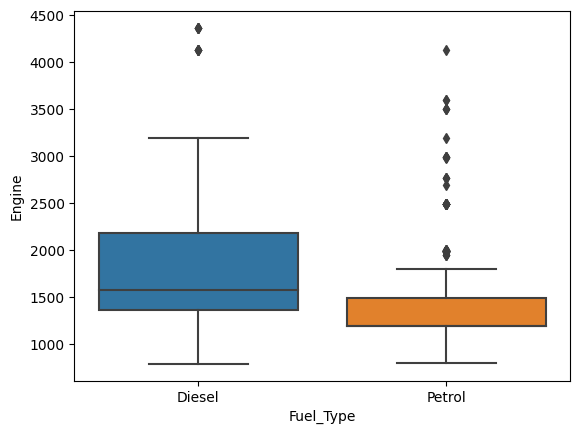

In [220]:
# Checking for outliers in Fuel_Type
import seaborn as sns
sns.boxplot(x='Fuel_Type', y='Engine', data=df3 )

**Remove the data samples with outliers value in Engine**
* We will use Fuel_Type (Diesel and Petrol) information to remove outliers from Engine
* Because sample distribution for diesel and petrol cars are very close
* It will create a balanced data distribution


In [221]:
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


**Separate Data into two parts using Filtering**
* Part1 : dfd => all diesel cars
* Part2 : dfp => all petrol cars

In [222]:
dfd = df3[df3['Fuel_Type']=='Diesel']
dfp = df3[df3['Fuel_Type']=='Petrol']

In [223]:
# First we will remove outliers from the Engine of diesel type
dfd.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


**Use 'describe' function on 'Engine' column to identify 25 percentile(q1) and 75 percentile(q2)**

In [224]:
dfd['Engine'].describe()

count    2400.000000
mean     1796.109583
std       575.627987
min       793.000000
25%      1364.000000
50%      1582.000000
75%      2179.000000
max      4367.000000
Name: Engine, dtype: float64

In [225]:
q1=dfd['Engine'].describe()[4]
q3=dfd['Engine'].describe()[6]
print(q1,q3)

iqr = q3 - q1
lf = q1  - 1.5 * iqr
uf = q3 + 1.5 * iqr
print(lf,uf)

1364.0 2179.0
141.5 3401.5


In [226]:
# For diesel cars, if engine value is lesser than 141.5 and higher than 3401.5 then it will be an outlier
# View outlier samples
dfd[(dfd['Engine'] < 141.5) | (dfd['Engine'] > 3401.5)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
459,audi q7,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,48.91
586,audi q7,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,29.77
1038,land rover,Bangalore,2011,55000,Diesel,Automatic,First,10.20,4367.0,308.0,7.0,67.00
1093,audi q7,Bangalore,2014,50000,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,51.00
1352,land rover,Bangalore,2012,66538,Diesel,Automatic,First,10.20,4367.0,308.0,7.0,70.00
3242,land rover,Bangalore,2012,63000,Diesel,Automatic,Second and above,11.49,4367.0,335.3,5.0,65.00
4388,audi q7,Bangalore,2015,50000,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,48.00
4559,audi q7,Delhi,2010,73000,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,17.51
4869,land rover,Coimbatore,2012,84384,Diesel,Automatic,First,10.20,4367.0,308.0,7.0,52.54
4938,audi q7,Coimbatore,2015,56238,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,51.69


In [227]:
# Filter out car samples in outlier range of engine
dfd = dfd[~((dfd['Engine'] < 141.5) | (dfd['Engine'] > 3401.5))]
dfd.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


In [228]:
dfd.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               9
Engine                7
Power                44
Seats                 9
Price                 0
dtype: int64

In [229]:
# Fill the missing Engine values with average value of engine for diesel cars
dfd['Engine'] = dfd['Engine'].fillna(dfd['Engine'].mean())

<Axes: ylabel='Engine'>

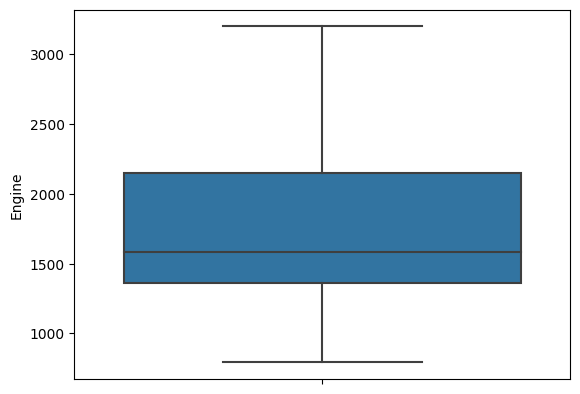

In [230]:
sns.boxplot(y = 'Engine' , data=dfd)

In [231]:
# Similarly removing outliers from engine of petrol cars
dfp.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
10,maruti ciaz,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95
11,honda city,Kolkata,2012,60000,Petrol,Automatic,First,16.80,1497.0,116.30,5.0,4.49
22,audi a6,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984.0,177.01,5.0,23.50
23,hyundai i20,Kolkata,2010,45807,Petrol,Manual,First,18.50,1197.0,80.00,5.0,1.87


In [232]:
q1 = dfp['Engine'].describe()[4]
q3 = dfp['Engine'].describe()[6]
print(q1,q3)

iqr = q3 - q1
lf = q1 - (1.5*iqr)
uf = q3 + (1.5*iqr)
print(lf,uf)

1196.0 1497.0
744.5 1948.5


In [233]:
((dfp['Engine'] < 744.5) | (dfp['Engine'] > 1948.5)).sum()

57

In [234]:
# 1.2 % of total sample size falls under outliers in case of petrol
((dfp['Engine'] < 744.5) | (dfp['Engine'] > 1948.5)).sum()/len(df3)

0.012329656067488644

In [235]:
# Data samples as engine outliers in petrol cars
dfp[(dfp['Engine'] < 744.5) | (dfp['Engine'] > 1948.5)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
22,audi a6,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984.0,177.01,5.0,23.50
47,toyota innova,Bangalore,2012,70704,Petrol,Manual,First,11.25,2694.0,163.70,7.0,10.95
77,toyota innova,Chennai,2006,230000,Petrol,Manual,Second and above,12.40,1998.0,132.00,8.0,4.50
118,bmw 5,Mumbai,2009,128000,Petrol,Automatic,First,10.80,2497.0,215.00,5.0,7.00
351,skoda octavia,Jaipur,2005,100000,Petrol,Automatic,First,14.45,1984.0,227.00,5.0,2.05
473,mercedes-benz e-class,Kochi,2018,26405,Petrol,Automatic,First,12.60,1950.0,191.34,5.0,51.43
488,bmw 5,Kolkata,2011,31000,Petrol,Automatic,First,10.80,2497.0,150.00,5.0,13.50
531,bmw 3,Coimbatore,2010,48394,Petrol,Automatic,First,12.05,1995.0,154.00,5.0,10.49
536,mercedes-benz e-class,Kolkata,2010,50645,Petrol,Automatic,Second and above,10.93,2497.0,204.00,5.0,10.75
544,mercedes-benz new,Kochi,2019,13190,Petrol,Automatic,First,NaN,1950.0,181.43,5.0,38.99


In [236]:
dfp = dfp[~((dfp['Engine'] < 744.5) | (dfp['Engine'] > 1948.5))]
dfp.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,honda jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
10,maruti ciaz,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95
11,honda city,Kolkata,2012,60000,Petrol,Automatic,First,16.80,1497.0,116.30,5.0,4.49
23,hyundai i20,Kolkata,2010,45807,Petrol,Manual,First,18.50,1197.0,80.00,5.0,1.87
24,volkswagen vento,Kolkata,2010,33000,Petrol,Automatic,First,14.40,1598.0,103.60,5.0,2.85


In [237]:
dfp.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              37
Engine               25
Power                71
Seats                26
Price                 0
dtype: int64

In [238]:
# Fill the missing Engine values with average value of engine for petrol cars
dfp['Engine'] = dfp['Engine'].fillna(dfp['Engine'].mean())

<ipython-input-238-b1dd407e297b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Engine'] = dfp['Engine'].fillna(dfp['Engine'].mean())


**Combining dfd and dfp using pd.concat((dfd,dfp))**

---



In [239]:
df4 = pd.concat((dfd,dfp))
df4.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,hyundai creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,maruti ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,audi a4,Coimbatore,2013,40670,Diesel,Automatic,Second and above,15.20,1968.0,140.80,5.0,17.74
6,nissan micra,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,toyota innova,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50


In [240]:
df4.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               46
Engine                 0
Power                115
Seats                 35
Price                  0
dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Engine'>

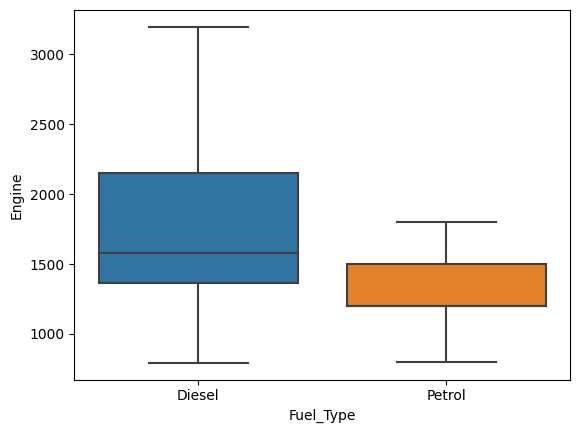

In [241]:
sns.boxplot(x = 'Fuel_Type', y = 'Engine', data=df4)

In [242]:
df4.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               46
Engine                 0
Power                115
Seats                 35
Price                  0
dtype: int64